In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
df=pd.read_excel(r'C:\Users\ali.farajimohammad\Desktop\ARCHIVE_MAIN\Archive\Project_NAK\Project_NAC\Cell_list.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61035 entries, 0 to 61034
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PERIOD_START_TIME               61035 non-null  datetime64[ns]
 1   CELLNAME                        61035 non-null  object        
 2   City                            61035 non-null  object        
 3   RB_UTILIZATION_DL               61035 non-null  float64       
 4   LATENCY_DL_SCHEDULING_MSEC      61035 non-null  float64       
 5   THROUGHPUT_UE_LEGACY_DL_KBPS    61035 non-null  float64       
 6   DEN_THR                         61035 non-null  int64         
 7   NUM_THR                         61035 non-null  int64         
 8   CQI_WIDEBAND_AVERAGE            61035 non-null  float64       
 9   PAYLOAD_PDCP_DL_GBYTE           61035 non-null  float64       
 10  AVG_ACTIVE_UE_DL                61035 non-null  float64       
 11  MA

In [7]:
df.columns

Index(['PERIOD_START_TIME', 'CELLNAME', 'City', 'RB_UTILIZATION_DL',
       'LATENCY_DL_SCHEDULING_MSEC', 'THROUGHPUT_UE_LEGACY_DL_KBPS', 'DEN_THR',
       'NUM_THR', 'CQI_WIDEBAND_AVERAGE', 'PAYLOAD_PDCP_DL_GBYTE',
       'AVG_ACTIVE_UE_DL', 'MAX_RRC_CONNECTED_UE', 'AVG_RRC_CONNECTED_UE',
       'DL_IBLER', 'DL_RETX', 'HARQ_NACK_RATE_DL', 'USED_MCS_PDSCH_AVG',
       'AVERAGE_USERS_DISTANCE_KM', 'LAST_TTI_PAYLOAD_RATIO_ALL_QCI',
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9', 'PAYLOAD_PDCP_DL_GBYTE.1', 'Status',
       'Temperature (°F)', 'Humidity (%)', 'Wind Speed (mph)'],
      dtype='object')

In [8]:
DF=df[[
   'RB_UTILIZATION_DL', 'THROUGHPUT_UE_LEGACY_DL_KBPS',
        'DEN_THR',
       'NUM_THR',
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
        'USED_MCS_PDSCH_AVG','PAYLOAD_PDCP_DL_GBYTE','LATENCY_DL_SCHEDULING_MSEC','AVG_RRC_CONNECTED_UE','DL_IBLER'
       , 'LAST_TTI_PAYLOAD_RATIO_ALL_QCI',
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']]

# EDA

In [9]:
DF

RB_UTILIZATION_DL  THROUGHPUT_UE_LEGACY_DL_KBPS    DEN_THR  \
0                  69.79                       5213.27  185645439   
1                   8.10                      36331.90    3502450   
2                   5.86                      30545.29    1791919   
3                  22.11                      25039.05   15860469   
4                  25.77                      25103.51   20642742   
...                  ...                           ...        ...   
61030              10.84                      22969.98    2684992   
61031              42.80                      19457.59   44198980   
61032              25.63                      17624.59   22027144   
61033              28.79                      14194.79   26904843   
61034              42.26                      12513.91   46733078   

            NUM_THR  CQI_WIDEBAND_AVERAGE  AVG_ACTIVE_UE_DL  \
0      967819425384                  8.95              5.07   
1      127250675432                 11.49              0.27   
2       54734685480                 10.51              0.14   
3      397131068400                 10.25              0.72   
4      518205317016                  8.21              0.58   
...             ...                   ...               ...   
61030   61674213192                 10.34              0.22   
61031  860005844464                  9.58              1.95   
61032  388219385800                 11.90              1.09   
61033  381908678352                 10.05              1.25   
61034  584813542008                  8.60              1.44   

       USED_MCS_PDSCH_AVG  PAYLOAD_PDCP_DL_GBYTE  LATENCY_DL_SCHEDULING_MSEC  \
0                   13.91                 151.34                        3.72   
1                   16.04                  24.27                        1.39   
2                   15.05                  10.61                        1.51   
3                   16.64                  72.15                        1.49   
4                   14.47                  74.44                        1.42   
...                   ...                    ...                         ...   
61030               15.10                  11.60                        1.67   
61031               15.64                 143.11                        1.97   
61032               13.70                  64.16                        3.10   
61033               13.35                  58.34                        3.02   
61034               13.91                  87.07                        1.81   

       AVG_RRC_CONNECTED_UE  DL_IBLER  LAST_TTI_PAYLOAD_RATIO_ALL_QCI  \
0                     78.58     14.30                           19.98   
1                     11.40     15.59                           34.41   
2                      5.54     14.92                           35.44   
3                     20.82     14.04                           31.17   
4                     13.83     13.29                           12.97   
...                     ...       ...                             ...   
61030                  8.92     13.54                           33.24   
61031                 53.39     14.29                           24.82   
61032                 33.50     12.96                           24.29   
61033                 21.60     12.54                           18.10   
61034                 33.73     13.39                           16.00   

       LAST_TTI_PAYLOAD_RATIO_DL_QCI9  
0                               19.81  
1                               34.35  
2                               35.30  
3                               31.12  
4                               12.95  
...                               ...  
61030                           33.08  
61031                           24.75  
61032                           24.19  
61033                           18.03  
61034                           15.95  

[61035 rows x 13 columns]

In [16]:
df.columns

Index(['PERIOD_START_TIME', 'CELLNAME', 'City', 'RB_UTILIZATION_DL',
       'LATENCY_DL_SCHEDULING_MSEC', 'THROUGHPUT_UE_LEGACY_DL_KBPS', 'DEN_THR',
       'NUM_THR', 'CQI_WIDEBAND_AVERAGE', 'PAYLOAD_PDCP_DL_GBYTE',
       'AVG_ACTIVE_UE_DL', 'MAX_RRC_CONNECTED_UE', 'AVG_RRC_CONNECTED_UE',
       'DL_IBLER', 'DL_RETX', 'HARQ_NACK_RATE_DL', 'USED_MCS_PDSCH_AVG',
       'AVERAGE_USERS_DISTANCE_KM', 'LAST_TTI_PAYLOAD_RATIO_ALL_QCI',
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9', 'PAYLOAD_PDCP_DL_GBYTE.1', 'Status',
       'Temperature (°F)', 'Humidity (%)', 'Wind Speed (mph)'],
      dtype='object')

In [23]:

grouped = df.groupby(['PERIOD_START_TIME', 'City'])[['DEN_THR','NUM_THR']].sum().reset_index()
grouped['THR']=grouped['NUM_THR']/grouped['DEN_THR']
grouped




import plotly.express as px
plt.figure(figsize=(12,10))
# sns.lineplot(data=grouped)
px.line(grouped, x = grouped.PERIOD_START_TIME, y = grouped.THR)

<Figure size 1200x1000 with 0 Axes>

In [24]:

import plotly.express as px
plt.figure(figsize=(12,10))
# sns.lineplot(data=grouped)
px.line(grouped, x = grouped.PERIOD_START_TIME, y = grouped.THR)

<Figure size 1200x1000 with 0 Axes>

In [25]:
df['PERIOD_START_TIME'] = pd.to_datetime(df['PERIOD_START_TIME'])

df = df.sort_values(by='PERIOD_START_TIME')
most_recent_date = df['PERIOD_START_TIME'].max()
two_days_ago = most_recent_date - pd.Timedelta(days=2)
last_two_days_data = df[df['PERIOD_START_TIME'] > two_days_ago]
last_two_days_data

PERIOD_START_TIME   CELLNAME  City  RB_UTILIZATION_DL  \
56751        2023-07-18  LT4035XC2  City              33.17   
56743        2023-07-18  LT4033XC1  City              22.31   
56744        2023-07-18  LT4053XC3  City              39.87   
56745        2023-07-18  LH8177XB3  City              22.32   
56746        2023-07-18  LT4035XB2  City              26.98   
...                 ...        ...   ...                ...   
58894        2023-07-19  LH1527XF5  City              56.17   
58895        2023-07-19  LT4031XD3  City              40.18   
58896        2023-07-19  LT4052XC1  City              52.19   
58886        2023-07-19  LT4346XC5  City               9.38   
61034        2023-07-19  LH1028XB5  City              42.26   

       LATENCY_DL_SCHEDULING_MSEC  THROUGHPUT_UE_LEGACY_DL_KBPS   DEN_THR  \
56751                        1.75                      21120.59  33443869   
56743                        1.75                      21957.11  14727449   
56744                        2.07                       8918.28  47240248   
56745                        1.91                      18213.92  17936167   
56746                        1.58                      26811.78  22130271   
...                           ...                           ...       ...   
58894                        1.91                      11068.38  87174429   
58895                        1.60                      29587.00  35792764   
58896                        2.61                       7236.58  91189225   
58886                        1.39                      30752.43   5434393   
61034                        1.81                      12513.91  46733078   

             NUM_THR  CQI_WIDEBAND_AVERAGE  PAYLOAD_PDCP_DL_GBYTE  ...  \
56751   706354090720                  9.37                 114.90  ...   
56743   323372150760                 10.39                  57.55  ...   
56744   421301991360                  7.52                  61.13  ...   
56745   326687986008                  9.68                  51.88  ...   
56746   593351940952                  9.96                  95.53  ...   
...              ...                   ...                    ...  ...   
58894   964879836824                  9.07                 144.99  ...   
58895  1059000596184                  9.07                 152.90  ...   
58896   659898562216                  8.50                 104.27  ...   
58886   167120784736                 10.50                  32.29  ...   
61034   584813542008                  8.60                  87.07  ...   

       HARQ_NACK_RATE_DL  USED_MCS_PDSCH_AVG  AVERAGE_USERS_DISTANCE_KM  \
56751              11.54               15.34                       0.38   
56743              11.18               16.44                       0.28   
56744              13.85               11.57                       0.50   
56745              13.35               14.18                       0.57   
56746              11.60               15.90                       0.47   
...                  ...                 ...                        ...   
58894               9.82               14.52                       0.52   
58895              11.84               14.71                       0.42   
58896              11.25               13.41                       0.71   
58886               9.06               17.37                       0.25   
61034              10.06               13.91                       0.62   

       LAST_TTI_PAYLOAD_RATIO_ALL_QCI  LAST_TTI_PAYLOAD_RATIO_DL_QCI9  \
56751                           23.13                           23.08   
56743                           29.68                           29.57   
56744                           13.81                           13.73   
56745                           21.23                           21.17   
56746                           22.33                           22.28   
...                               ...                             ...   
58894                  

In [26]:
DF.corr()

RB_UTILIZATION_DL  \
RB_UTILIZATION_DL                        1.000000   
THROUGHPUT_UE_LEGACY_DL_KBPS            -0.617113   
DEN_THR                                  0.888473   
NUM_THR                                  0.882930   
CQI_WIDEBAND_AVERAGE                    -0.219078   
AVG_ACTIVE_UE_DL                         0.868590   
USED_MCS_PDSCH_AVG                      -0.002911   
PAYLOAD_PDCP_DL_GBYTE                    0.852895   
LATENCY_DL_SCHEDULING_MSEC               0.447678   
AVG_RRC_CONNECTED_UE                     0.835687   
DL_IBLER                                 0.268202   
LAST_TTI_PAYLOAD_RATIO_ALL_QCI          -0.375369   
LAST_TTI_PAYLOAD_RATIO_DL_QCI9          -0.375836   

                                THROUGHPUT_UE_LEGACY_DL_KBPS   DEN_THR  \
RB_UTILIZATION_DL                                  -0.617113  0.888473   
THROUGHPUT_UE_LEGACY_DL_KBPS                        1.000000 -0.591006   
DEN_THR                                            -0.591006  1.000000   
NUM_THR                                            -0.295376  0.797551   
CQI_WIDEBAND_AVERAGE                                0.524273 -0.214737   
AVG_ACTIVE_UE_DL                                   -0.496335  0.951579   
USED_MCS_PDSCH_AVG                                  0.590372 -0.041415   
PAYLOAD_PDCP_DL_GBYTE                              -0.240712  0.764522   
LATENCY_DL_SCHEDULING_MSEC                         -0.463621  0.575771   
AVG_RRC_CONNECTED_UE                               -0.369976  0.827902   
DL_IBLER                                           -0.382921  0.206156   
LAST_TTI_PAYLOAD_RATIO_ALL_QCI                      0.649295 -0.321344   
LAST_TTI_PAYLOAD_RATIO_DL_QCI9                      0.650912 -0.322184   

                                 NUM_THR  CQI_WIDEBAND_AVERAGE  \
RB_UTILIZATION_DL               0.882930             -0.219078   
THROUGHPUT_UE_LEGACY_DL_KBPS   -0.295376              0.524273   
DEN_THR                         0.797551             -0.214737   
NUM_THR                         1.000000             -0.012409   
CQI_WIDEBAND_AVERAGE           -0.012409              1.000000   
AVG_ACTIVE_UE_DL                0.827896             -0.084618   
USED_MCS_PDSCH_AVG              0.280729              0.583494   
PAYLOAD_PDCP_DL_GBYTE           0.993025              0.040473   
LATENCY_DL_SCHEDULING_MSEC      0.310538              0.112474   
AVG_RRC_CONNECTED_UE            0.860390             -0.019740   
DL_IBLER                        0.128872             -0.364159   
LAST_TTI_PAYLOAD_RATIO_ALL_QCI -0.162176              0.551889   
LAST_TTI_PAYLOAD_RATIO_DL_QCI9 -0.161876              0.552263   

                                AVG_ACTIVE_UE_DL  USED_MCS_PDSCH_AVG  \
RB_UTILIZATION_DL                       0.868590           -0.002911   
THROUGHPUT_UE_LEGACY_DL_KBPS           -0.496335            0.590372   
DEN_THR                                 0.951579           -0.041415   
NUM_THR                                 0.827896            0.280729   
CQI_WIDEBAND_AVERAGE                   -0.084618            0.583494   
AVG_ACTIVE_UE_DL                        1.000000            0.090466   
USED_MCS_PDSCH_AVG                      0.090466            1.000000   
PAYLOAD_PDCP_DL_GBYTE                   0.815149            0.342300   
LATENCY_DL_SCHEDULING_MSEC              0.626754           -0.273271   
AVG_RRC_CONNECTED_UE                    0.902541            0.219128   
DL_IBLER                                0.158229           -0.089454   
LAST_TTI_PAYLOAD_RATIO_ALL_QCI         -0.183055            0.600895   
LAST_TTI_PAYLOAD_RATIO_DL_QCI9         -0.184073            0.601623   

                                PAYLOAD_PDCP_DL_GBYTE  \
RB_UTILIZATION_DL                            0.852895   
THROUGHPUT_UE_LEGACY_DL_KBPS                -0.240712   
DEN_THR                                      0.764522   
NUM_THR                                      0.993025   
CQI_WIDEBAND_AVERAGE             

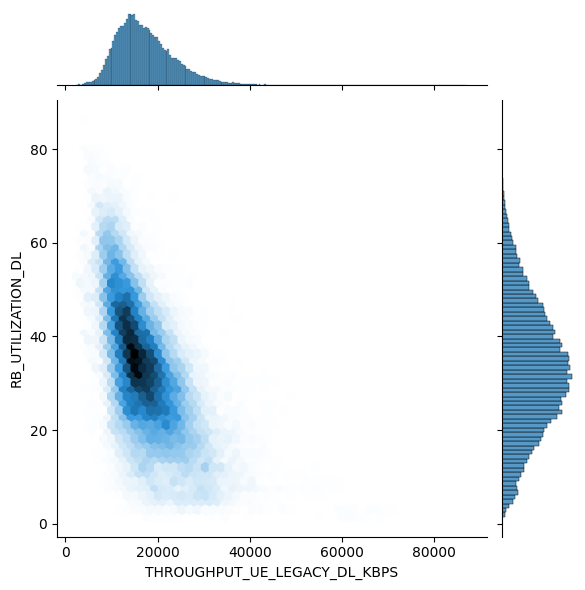

In [27]:
sns.jointplot(x='THROUGHPUT_UE_LEGACY_DL_KBPS',y='RB_UTILIZATION_DL',kind='hex',data=DF)


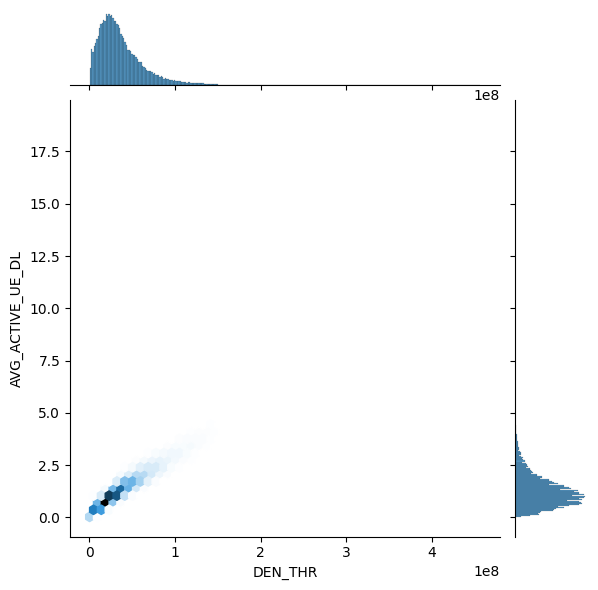

In [242]:
sns.color_palette("Paired")
sns.jointplot(x='DEN_THR',y='AVG_ACTIVE_UE_DL',palette='coolwarm',kind='hex',data=DF)

<AxesSubplot: >

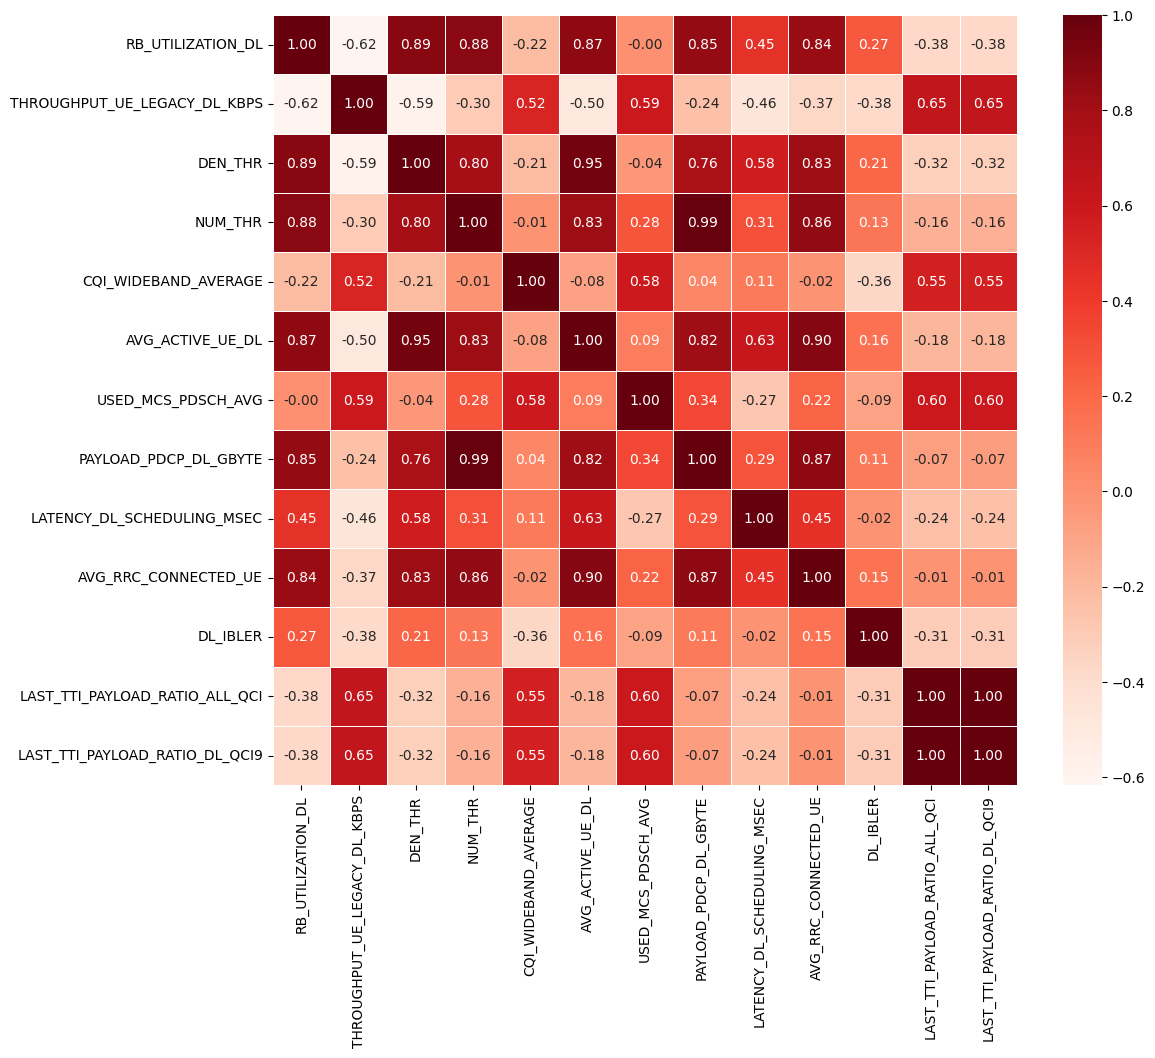

In [243]:
plt.figure(figsize=(12,10))
sns.heatmap(DF.corr(),annot=True,annot_kws={"size":10},cmap='Reds',fmt='.2f',linewidths=0.5) # cmap = Blues, Greens

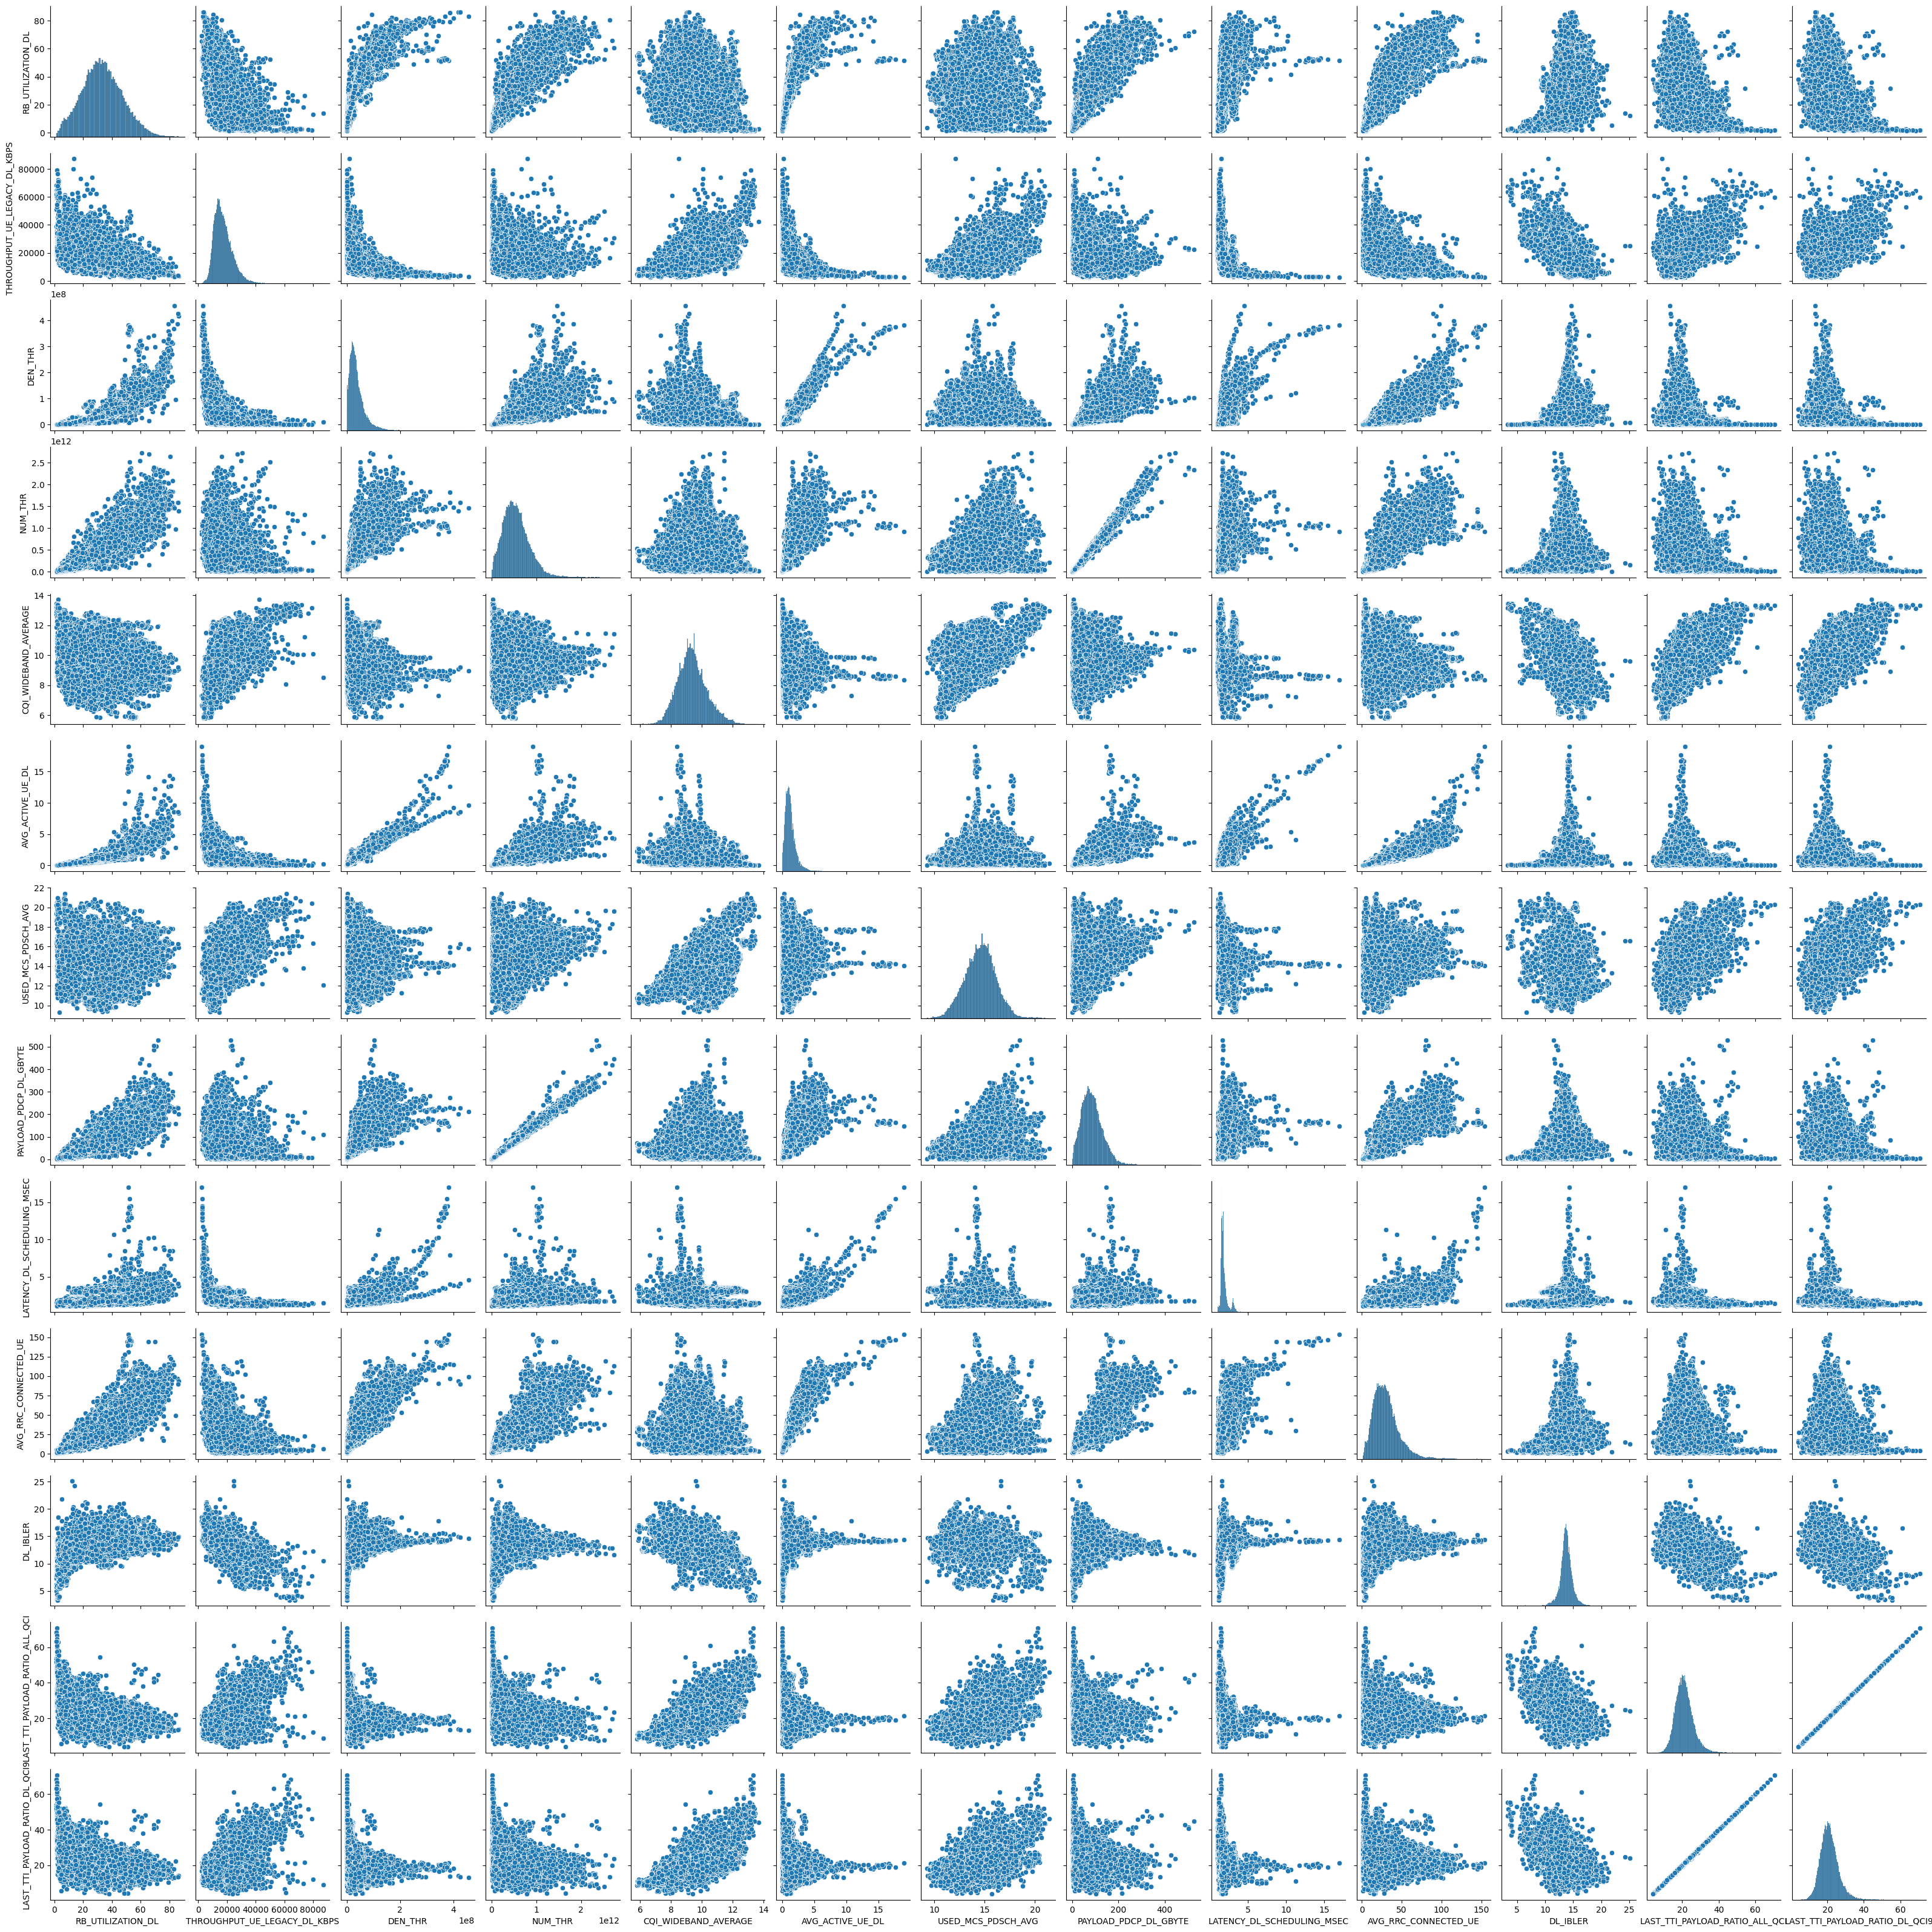

In [244]:
sns.pairplot(DF)

# Models

### Random Forest

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'throughput' has 'num' and 'denum' columns for numerator and denominator respectively
target_col_num = 'NUM_THR'
target_col_denum = 'DEN_THR'
feature_cols = ['RB_UTILIZATION_DL', 
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
       'DL_RETX', 'USED_MCS_PDSCH_AVG',
       'LAST_TTI_PAYLOAD_RATIO_ALL_QCI',
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']


X = df[feature_cols]
y_num = df[target_col_num]
y_denum = df[target_col_denum]


# X_train, X_test, y_num_train, y_num_test, y_denum_train, y_denum_test = train_test_split(X, y_num, y_denum, test_size=0.2, random_state=42)
X_train,y_num_train,y_denum_train=X[:54615],y_num[:54615],y_denum[:54615]
X_test, y_num_test, y_denum_test = X[54615:],y_num[54615:],y_denum[54615:]


model_num = RandomForestRegressor(n_estimators=100, random_state=42)
model_denum = RandomForestRegressor(n_estimators=100, random_state=42)


model_num.fit(X_train, y_num_train)
model_denum.fit(X_train, y_denum_train)

y_num_pred = model_num.predict(X_test)
y_denum_pred = model_denum.predict(X_test)

# Evaluate the models
mse_num = mean_squared_error(y_num_test, y_num_pred)
r2_num = r2_score(y_num_test, y_num_pred)

mse_denum = mean_squared_error(y_denum_test, y_denum_pred)
r2_denum = r2_score(y_denum_test, y_denum_pred)

print(f"Mean Squared Error (MSE) for numerator: {mse_num:.2f}")
print(f"R-squared (R2) for numerator: {r2_num:.2f}")

print(f"Mean Squared Error (MSE) for denominator: {mse_denum:.2f}")
print(f"R-squared (R2) for denominator: {r2_denum:.2f}")

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\4165574516.py:23: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\4165574516.py:24: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Mean Squared Error (MSE) for numerator: 4729389251228624486400.00
R-squared (R2) for numerator: 0.94
Mean Squared Error (MSE) for denominator: 18499388376429.51
R-squared (R2) for denominator: 0.98


In [246]:
y_denum_pred_S=pd.Series(y_denum_pred,index=y_denum_test.index)
DEN=pd.concat([y_denum_test,y_denum_pred_S],axis=1)

DEN.rename(columns={0:'PRED_DEN'},inplace=True)
y_num_pred_S=pd.Series(y_num_pred,index=y_num_test.index)
NUM=pd.concat([y_num_test,y_num_pred_S],axis=1)
NUM.rename(columns={0:'PRED_NUM'},inplace=True)
COMPA=pd.concat([DEN,NUM],axis=1)
CELL_DATE=df[['PERIOD_START_TIME','CELLNAME']]
CELL_DATE_TEST=CELL_DATE[54615:]
CELL_DATE_TEST
RESULT=pd.concat([CELL_DATE_TEST,COMPA],axis=1)
RESULT

FINAL= RESULT.groupby(['PERIOD_START_TIME'])['PRED_DEN','PRED_NUM','NUM_THR','DEN_THR'].sum().reset_index()
FINAL['THR_P']=FINAL['PRED_NUM']/FINAL['PRED_DEN']
FINAL['THR']=FINAL['NUM_THR']/FINAL['DEN_THR']

FINAL
px.line(FINAL, x = FINAL.PERIOD_START_TIME, y = [FINAL.THR,FINAL.THR_P])

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\3444472551.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [247]:
FINAL['DELTA%']=((FINAL['THR_P']-FINAL['THR'])/FINAL['THR'])*100
FINAL

PERIOD_START_TIME      PRED_DEN      PRED_NUM           NUM_THR  \
0        2023-07-18  1.219146e+11  1.749063e+15  1759716668981392   
1        2023-07-19  1.263478e+11  1.778525e+15  1768271965151320   

        DEN_THR         THR_P           THR    DELTA%  
0  121779724497  14346.625984  14449.997126 -0.715371  
1  125647734429  14076.427036  14073.249893  0.022576

### Histogram-based Gradient Boosting


In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


target_col_num = 'NUM_THR'
target_col_denum = 'DEN_THR'
feature_cols = ['RB_UTILIZATION_DL', 
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
       'DL_RETX', 'USED_MCS_PDSCH_AVG',
       'LAST_TTI_PAYLOAD_RATIO_ALL_QCI', 
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']


X = df[feature_cols]
y_num = df[target_col_num]
y_denum = df[target_col_denum]


# train_test_split(X, y_num, y_denum, test_size=0.2, random_state=42)
X_train,y_num_train,y_denum_train=X[:54615],y_num[:54615],y_denum[:54615]
X_test, y_num_test, y_denum_test = X[54615:],y_num[54615:],y_denum[54615:]


model_num = HistGradientBoostingRegressor()
model_denum = HistGradientBoostingRegressor()


model_num.fit(X_train, y_num_train)
model_denum.fit(X_train, y_denum_train)

y_num_pred = model_num.predict(X_test)
y_denum_pred = model_denum.predict(X_test)

# Evaluate the models
mse_num = mean_squared_error(y_num_test, y_num_pred)
r2_num = r2_score(y_num_test, y_num_pred)

mse_denum = mean_squared_error(y_denum_test, y_denum_pred)
r2_denum = r2_score(y_denum_test, y_denum_pred)

print(f"Mean Squared Error (MSE) for numerator: {mse_num:.2f}")
print(f"R-squared (R2) for numerator: {r2_num:.2f}")

print(f"Mean Squared Error (MSE) for denominator: {mse_denum:.2f}")
print(f"R-squared (R2) for denominator: {r2_denum:.2f}")


C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\1914611061.py:24: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\1914611061.py:25: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Mean Squared Error (MSE) for numerator: 5394436701373004251136.00
R-squared (R2) for numerator: 0.94
Mean Squared Error (MSE) for denominator: 24771448552505.95
R-squared (R2) for denominator: 0.97


In [249]:
y_denum_pred_S=pd.Series(y_denum_pred,index=y_denum_test.index)
DEN=pd.concat([y_denum_test,y_denum_pred_S],axis=1)

DEN.rename(columns={0:'PRED_DEN'},inplace=True)
y_num_pred_S=pd.Series(y_num_pred,index=y_num_test.index)
NUM=pd.concat([y_num_test,y_num_pred_S],axis=1)
NUM.rename(columns={0:'PRED_NUM'},inplace=True)
COMPA=pd.concat([DEN,NUM],axis=1)
CELL_DATE=df[['PERIOD_START_TIME','CELLNAME']]
CELL_DATE_TEST=CELL_DATE[54615:]
CELL_DATE_TEST
RESULT=pd.concat([CELL_DATE_TEST,COMPA],axis=1)
RESULT

FINAL= RESULT.groupby(['PERIOD_START_TIME'])['PRED_DEN','PRED_NUM','NUM_THR','DEN_THR'].sum().reset_index()
FINAL['THR_P']=FINAL['PRED_NUM']/FINAL['PRED_DEN']
FINAL['THR']=FINAL['NUM_THR']/FINAL['DEN_THR']

FINAL
px.line(FINAL, x = FINAL.PERIOD_START_TIME, y = [FINAL.THR,FINAL.THR_P])

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\3444472551.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [250]:
FINAL['DELTA%']=((FINAL['THR_P']-FINAL['THR'])/FINAL['THR'])*100
FINAL

PERIOD_START_TIME      PRED_DEN      PRED_NUM           NUM_THR  \
0        2023-07-18  1.218792e+11  1.750663e+15  1759716668981392   
1        2023-07-19  1.261835e+11  1.776471e+15  1768271965151320   

        DEN_THR         THR_P           THR    DELTA%  
0  121779724497  14363.922689  14449.997126 -0.595671  
1  125647734429  14078.471700  14073.249893  0.037104

### ExtraTrees

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

target_col_num = 'NUM_THR'
target_col_denum = 'DEN_THR'
feature_cols = ['RB_UTILIZATION_DL', 
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
       'DL_RETX', 'USED_MCS_PDSCH_AVG',
       'LAST_TTI_PAYLOAD_RATIO_ALL_QCI', 
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']

X = df[feature_cols]
y_num = df[target_col_num]
y_denum = df[target_col_denum]

# X_train, X_test, y_num_train, y_num_test, y_denum_train, y_denum_test = train_test_split(X, y_num, y_denum, test_size=0.2, random_state=42)
X_train,y_num_train,y_denum_train=X[:54615],y_num[:54615],y_denum[:54615]
X_test, y_num_test, y_denum_test = X[54615:],y_num[54615:],y_denum[54615:]


model_num = ExtraTreesRegressor(n_estimators=100, random_state=0)
model_denum = ExtraTreesRegressor(n_estimators=100, random_state=0)


model_num.fit(X_train, y_num_train)
model_denum.fit(X_train, y_denum_train)


y_num_pred = model_num.predict(X_test)
y_denum_pred = model_denum.predict(X_test)

# Evaluate the models
mse_num = mean_squared_error(y_num_test, y_num_pred)
r2_num = r2_score(y_num_test, y_num_pred)

mse_denum = mean_squared_error(y_denum_test, y_denum_pred)
r2_denum = r2_score(y_denum_test, y_denum_pred)

print(f"Mean Squared Error (MSE) for numerator: {mse_num:.2f}")
print(f"R-squared (R2) for numerator: {r2_num:.2f}")

print(f"Mean Squared Error (MSE) for denominator: {mse_denum:.2f}")
print(f"R-squared (R2) for denominator: {r2_denum:.2f}")


C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\1772683401.py:20: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\1772683401.py:21: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Mean Squared Error (MSE) for numerator: 4270097836955016364032.00
R-squared (R2) for numerator: 0.95
Mean Squared Error (MSE) for denominator: 17237868167077.98
R-squared (R2) for denominator: 0.98


In [252]:
y_denum_pred_S=pd.Series(y_denum_pred,index=y_denum_test.index)
DEN=pd.concat([y_denum_test,y_denum_pred_S],axis=1)

DEN.rename(columns={0:'PRED_DEN'},inplace=True)
y_num_pred_S=pd.Series(y_num_pred,index=y_num_test.index)
NUM=pd.concat([y_num_test,y_num_pred_S],axis=1)
NUM.rename(columns={0:'PRED_NUM'},inplace=True)
COMPA=pd.concat([DEN,NUM],axis=1)
CELL_DATE=df[['PERIOD_START_TIME','CELLNAME']]
CELL_DATE_TEST=CELL_DATE[54615:]
CELL_DATE_TEST
RESULT=pd.concat([CELL_DATE_TEST,COMPA],axis=1)
RESULT

FINAL= RESULT.groupby(['PERIOD_START_TIME'])['PRED_DEN','PRED_NUM','NUM_THR','DEN_THR'].sum().reset_index()
FINAL['THR_P']=FINAL['PRED_NUM']/FINAL['PRED_DEN']
FINAL['THR']=FINAL['NUM_THR']/FINAL['DEN_THR']


px.line(FINAL, x = FINAL.PERIOD_START_TIME, y = [FINAL.THR,FINAL.THR_P])

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\2523850732.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [253]:
FINAL['DELTA%']=((FINAL['THR_P']-FINAL['THR'])/FINAL['THR'])*100
FINAL

PERIOD_START_TIME      PRED_DEN      PRED_NUM           NUM_THR  \
0        2023-07-18  1.219077e+11  1.751115e+15  1759716668981392   
1        2023-07-19  1.262383e+11  1.779212e+15  1768271965151320   

        DEN_THR         THR_P           THR    DELTA%  
0  121779724497  14364.259825  14449.997126 -0.593338  
1  125647734429  14094.073196  14073.249893  0.147964

### Gradient Boosting for regression

In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

target_col_num = 'NUM_THR'
target_col_denum = 'DEN_THR'
feature_cols = ['RB_UTILIZATION_DL', 
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
       'DL_RETX', 'USED_MCS_PDSCH_AVG',
       'LAST_TTI_PAYLOAD_RATIO_ALL_QCI',
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']

X = df[feature_cols]
y_num = df[target_col_num]
y_denum = df[target_col_denum]


# X_train, X_test, y_num_train, y_num_test, y_denum_train, y_denum_test = train_test_split(X, y_num, y_denum, test_size=0.2, random_state=42)
X_train,y_num_train,y_denum_train=X[:54615],y_num[:54615],y_denum[:54615]
X_test, y_num_test, y_denum_test = X[54615:],y_num[54615:],y_denum[54615:]


model_num = GradientBoostingRegressor(random_state=0)
model_denum = GradientBoostingRegressor(random_state=0)

model_num.fit(X_train, y_num_train)
model_denum.fit(X_train, y_denum_train)


y_num_pred = model_num.predict(X_test)
y_denum_pred = model_denum.predict(X_test)

# Evaluate the models
mse_num = mean_squared_error(y_num_test, y_num_pred)
r2_num = r2_score(y_num_test, y_num_pred)

mse_denum = mean_squared_error(y_denum_test, y_denum_pred)
r2_denum = r2_score(y_denum_test, y_denum_pred)

print(f"Mean Squared Error (MSE) for numerator: {mse_num:.2f}")
print(f"R-squared (R2) for numerator: {r2_num:.2f}")

print(f"Mean Squared Error (MSE) for denominator: {mse_denum:.2f}")
print(f"R-squared (R2) for denominator: {r2_denum:.2f}")


C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\3841151897.py:21: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\3841151897.py:22: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Mean Squared Error (MSE) for numerator: 6565470376547354411008.00
R-squared (R2) for numerator: 0.92
Mean Squared Error (MSE) for denominator: 26978849329970.23
R-squared (R2) for denominator: 0.97


In [255]:
y_denum_pred_S=pd.Series(y_denum_pred,index=y_denum_test.index)
DEN=pd.concat([y_denum_test,y_denum_pred_S],axis=1)

DEN.rename(columns={0:'PRED_DEN'},inplace=True)
y_num_pred_S=pd.Series(y_num_pred,index=y_num_test.index)
NUM=pd.concat([y_num_test,y_num_pred_S],axis=1)
NUM.rename(columns={0:'PRED_NUM'},inplace=True)
COMPA=pd.concat([DEN,NUM],axis=1)
CELL_DATE=df[['PERIOD_START_TIME','CELLNAME']]
CELL_DATE_TEST=CELL_DATE[54615:]
CELL_DATE_TEST
RESULT=pd.concat([CELL_DATE_TEST,COMPA],axis=1)
RESULT

FINAL= RESULT.groupby(['PERIOD_START_TIME'])['PRED_DEN','PRED_NUM','NUM_THR','DEN_THR'].sum().reset_index()
FINAL['THR_P']=FINAL['PRED_NUM']/FINAL['PRED_DEN']
FINAL['THR']=FINAL['NUM_THR']/FINAL['DEN_THR']


px.line(FINAL, x = FINAL.PERIOD_START_TIME, y = [FINAL.THR,FINAL.THR_P])

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\2523850732.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [256]:
FINAL['DELTA%']=((FINAL['THR_P']-FINAL['THR'])/FINAL['THR'])*100
FINAL

PERIOD_START_TIME      PRED_DEN      PRED_NUM           NUM_THR  \
0        2023-07-18  1.219662e+11  1.751689e+15  1759716668981392   
1        2023-07-19  1.263798e+11  1.778919e+15  1768271965151320   

        DEN_THR         THR_P           THR    DELTA%  
0  121779724497  14362.078094  14449.997126 -0.608436  
1  125647734429  14075.971962  14073.249893  0.019342

### LightGBM 

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


X = df[['RB_UTILIZATION_DL', 'THROUGHPUT_UE_LEGACY_DL_KBPS',
        'DEN_THR',
       'NUM_THR',
       'CQI_WIDEBAND_AVERAGE', 
       'AVG_ACTIVE_UE_DL',
        'USED_MCS_PDSCH_AVG','PAYLOAD_PDCP_DL_GBYTE','LATENCY_DL_SCHEDULING_MSEC','AVG_RRC_CONNECTED_UE','DL_IBLER',
       'LAST_TTI_PAYLOAD_RATIO_ALL_QCI', 
       'LAST_TTI_PAYLOAD_RATIO_DL_QCI9']]
y_num = df['NUM_THR']
y_denum = df['DEN_THR']

X_train_num, X_val_num, y_train_num, y_val_num = train_test_split(X, y_num, test_size=0.2, random_state=42)

numerator_model = lgb.LGBMRegressor()
numerator_model.fit(X_train_num, y_train_num)


# X_train_denum, X_val_denum, y_train_denum, y_val_denum = train_test_split(X, y_denum, test_size=0.2, random_state=42)
X_train,y_num_train,y_denum_train=X[:54615],y_num[:54615],y_denum[:54615]
X_test, y_num_test, y_denum_test = X[54615:],y_num[54615:],y_denum[54615:]

denominator_model = lgb.LGBMRegressor()
denominator_model.fit(X_train_denum, y_train_denum)


predicted_throughput_num = numerator_model.predict(X_val_num)
predicted_throughput_denum = denominator_model.predict(X_val_denum)
# Evaluate the models
mse_num = mean_squared_error(y_val_num, predicted_throughput_num)
mse_denum = mean_squared_error(y_val_denum, predicted_throughput_denum)

print("Numerator Mean Squared Error:", mse_num)
print("Denominator Mean Squared Error:", mse_denum)



r2_num = r2_score(y_val_num, predicted_throughput_num)
print(f"R-squared (R2) for numerator: {r2_num:.2f}")
r2_denum = r2_score(y_val_denum, predicted_throughput_denum)
print(f"R-squared (R2) for denominator: {r2_denum:.2f}")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 48828, number of used features: 13
[LightGBM] [Info] Start training from score 548960688635.428223


C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\757567772.py:25: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\757567772.py:26: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 48828, number of used features: 14
[LightGBM] [Info] Start training from score 38012429.161321
Numerator Mean Squared Error: 6.519049623926902e+19
Denominator Mean Squared Error: 3277747049165.961
R-squared (R2) for numerator: 1.00
R-squared (R2) for denominator: 1.00


In [258]:
y_denum_pred_S=pd.Series(y_denum_pred,index=y_denum_test.index)
DEN=pd.concat([y_denum_test,y_denum_pred_S],axis=1)

DEN.rename(columns={0:'PRED_DEN'},inplace=True)
y_num_pred_S=pd.Series(y_num_pred,index=y_num_test.index)
NUM=pd.concat([y_num_test,y_num_pred_S],axis=1)
NUM.rename(columns={0:'PRED_NUM'},inplace=True)
COMPA=pd.concat([DEN,NUM],axis=1)
CELL_DATE=df[['PERIOD_START_TIME','CELLNAME']]
CELL_DATE_TEST=CELL_DATE[54615:]
CELL_DATE_TEST
RESULT=pd.concat([CELL_DATE_TEST,COMPA],axis=1)
RESULT

FINAL= RESULT.groupby(['PERIOD_START_TIME'])['PRED_DEN','PRED_NUM','NUM_THR','DEN_THR'].sum().reset_index()
FINAL['THR_P']=FINAL['PRED_NUM']/FINAL['PRED_DEN']
FINAL['THR']=FINAL['NUM_THR']/FINAL['DEN_THR']

FINAL
px.line(FINAL, x = FINAL.PERIOD_START_TIME, y = [FINAL.THR,FINAL.THR_P])


C:\Users\ali.farajimohammad\AppData\Local\Temp\ipykernel_14556\271109238.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [259]:

FINAL['DELTA%']=((FINAL['THR_P']-FINAL['THR'])/FINAL['THR'])*100
FINAL

PERIOD_START_TIME      PRED_DEN      PRED_NUM           NUM_THR  \
0        2023-07-18  1.219662e+11  1.751689e+15  1759716668981392   
1        2023-07-19  1.263798e+11  1.778919e+15  1768271965151320   

        DEN_THR         THR_P           THR    DELTA%  
0  121779724497  14362.078094  14449.997126 -0.608436  
1  125647734429  14075.971962  14073.249893  0.019342